# Week 3: Numpy

### Table of Contents

0. [A few things from base python first](#bullet0)
1. [Intialize an array](#bullet1)
2. [Operations with arrays](#bullet2)
3. [Converting a list to an array](#bullet3)
4. [Nested arrays](#bullet4)
5. [Numpy shortcut functions](#bullet5)
6. [dtype attribute](#bullet6)
7. [Indexing and Slicing](#bullet7)
8. [copy function](#bullet8)
9. [Boolean Indexing](#bullet9)
10. [Reshaping and Transposing Arrays](#bullet10)
11. [Uniform and Standard Normal Distributions](#bullet11)
12. [Universal Functions](#bullet12)
13. [np.where and list comprehensions](#bullet13)
14. [Mathematical and Statistical Methods](#bullet14)
15. [Methods for Boolean arrays](#bullet15)
16. [Sorting](#bullet16)
17. [The unique function](#bullet17)
18. [Linear Algebra](#bullet18)

## 0. A few things from base python first  <a class="anchor" id="bullet0"></a>

##### Python libraries
A Python library is a collection of pre-written code modules containing functions and tools that can be imported and used within your Python programs, essentially providing additional functionality to your code without having to write everything from scratch; popular Python libraries include NumPy for numerical computations, Pandas for data analysis, Matplotlib for data visualization, and SciPy for scientific computing. 

Today we are learning about NumPy but will learn many more from this graphic throughout the semester.
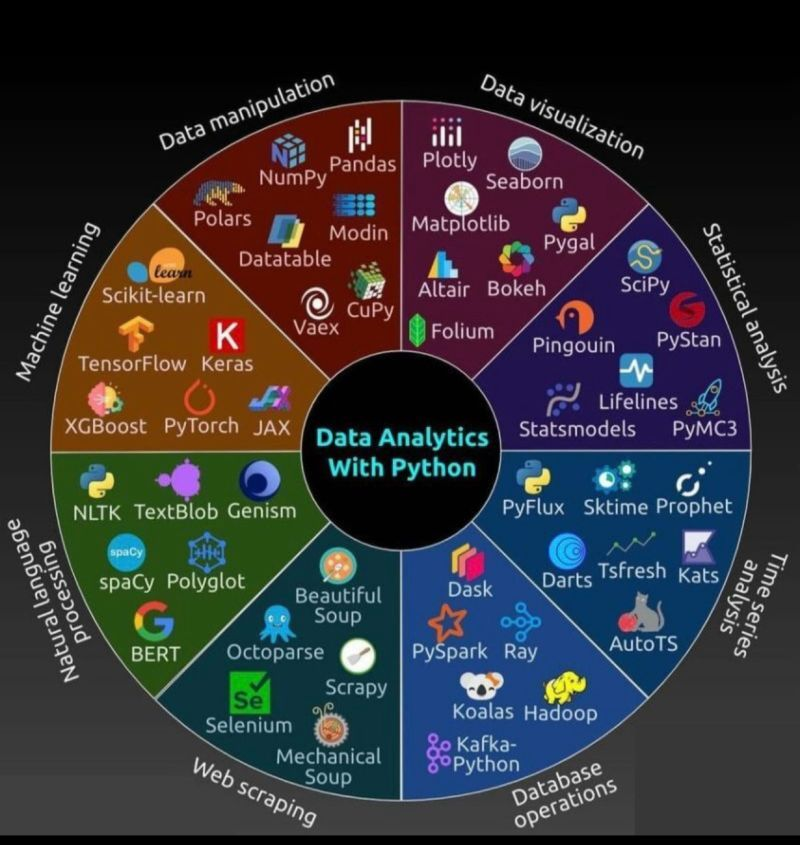

##### Changing your working directory

It is common for Python to interact with your hard drive to read and write data. There will always be a default working directory. Let's start with checking what it is. Then, we'll learn how to change it. 

In [3]:
import os # Part of the standard libraries you get, you'll never need to install but you do need to import
os.getcwd() # get the current working directory

'C:\\Users\\nicka\\OneDrive\\Desktop\\1 Modern Data Structures - GR5072\\QMSS-GR5072-Spring2025\\Week 3\\Programs'

In [6]:
#os.chdir(r"C:\Users\nicho\OneDrive\Desktop\MDS\QMSS-GR5072-Spring2025\Week 3") # laptop
os.chdir(r"C:\Users\nicka\OneDrive\Desktop\1 Modern Data Structures - GR5072\QMSS-GR5072-Spring2025\Week 3") # desktop
os.getcwd()

'C:\\Users\\nicka\\OneDrive\\Desktop\\1 Modern Data Structures - GR5072\\QMSS-GR5072-Spring2025\\Week 3'

##### Importing data into Python - Using the open() context manager

Over the course of the semester, we will learn many ways to import data into python, from using SQL databases, web scraping, or from APIs. This week, we will start with the basics when it comes to importing data: excel and text files. 

Let's start with opening `.txt` files. The `open()` function accepts two essential parameters: the file name and the mode. The default mode is 'r' , which opens the file for reading only. The `open()` function is a **context manager**, which in this case makes sure the connection to the file automatically closes when you are done with the connection. This frees up some RAM memory. 

Context managers are objects to be used with the python `with` keyword. It runs code when entering the block and exiting the block, i.e., it performs **setup and teardown steps**. Context managers let you avoid `try()` and `finally()` blocks of code (which we will study in depth later), in that no matter how the block exits, you get to execute some more code at the end of the block - even if the block raises an **exception** or uses a `return()` call to exit a function. We use context managers when you want to clean up or take other actions after a block ends.

In [9]:
path = r"C:\Users\nicka\OneDrive\Desktop\1 Modern Data Structures - GR5072\QMSS-GR5072-Spring2025\Week 3\Data"
path + r"\Importing data test.xlsx"

'C:\\Users\\nicka\\OneDrive\\Desktop\\1 Modern Data Structures - GR5072\\QMSS-GR5072-Spring2025\\Week 3\\Data\\Importing data test.xlsx'

In [16]:
with open(path + r"\Importing data test.txt") as f:
    print(f.read())

x y

1 5
2 6
3 7
4 8



##### Importing .xlsx data into Python

In [20]:
# Note that we cannot import the .xlsx file this way
with open(path + r"\Importing data test.xlsx") as f:
    df1 = f.read()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 16: character maps to <undefined>

In [21]:
# import excel file using pandas 
import pandas as pd
pd.read_excel(path + r"\Importing data test.xlsx", index_col=0)  

Y
X    
5   7
4   6
2   4
7  10
7  10
5   3

##### Tuple unpacking

This is important to know because as you interact with some packages/libraries, they will either return their results as tuples or you might have to input data as tuples. The key thing to remember about tuples is that they are **immutable**, so once they are made they cannot be edited.

In [22]:
fruits = ("apple", "banana", "cherry")

# Unpack this into variable names
(green, yellow, red) = fruits

print(green)
print(yellow)
print(red)

apple
banana
cherry


In [23]:
print(type(green)) # The individual tuple elements are not tuples! You can change/edit these values
green = green + green 
print(green)

<class 'str'>
appleapple


##### Jupyter Notebook shortcuts
Using short cuts depends on whether you are in **command mode** (you are able to edit the notebook as a whole, but not type into individual cells) or **edit mode** (where you can edit the code within a cell).
- Esc = Enter command mode
- Ctrl + Enter = Run current cell
- shift + tab = Exectute current cell and move to next
- alt + tab = Execute current cell and insert new cell below
- Use the Run menu to run all cells below/after current cell
- a = insert cell above
- b = insert cell below
- dd = delete cell

## 1. Intialize an array <a class="anchor" id="bullet1"></a>

Unlike list objects in base Python, numpy arrays can only have one data type. In most real-world applications, this makes sense! NumPy uses less space in memory, and is faster than base Python functions.

In [24]:
## importing necessary libraries
import numpy as np 

One of the features of NumPy is its **N-dimensional array object**. 

In [98]:
# use np.array to intialize a new ndarray object
arr1 = np.array([1, 2, 3, 4, 5])
print(arr1)

[1 2 3 4 5]


In [99]:
arr2 = np.array([[10, 20, 30], [5, 10, 15], [1, 1, 1]]) # nested 2D array (aka, a matrix)
print(arr2)

[[10 20 30]
 [ 5 10 15]
 [ 1  1  1]]


## 2. Operations with arrays <a class="anchor" id="bullet2"></a>

In [27]:
# scale an entire ndarray
arr1 * 10

array([10, 20, 30, 40, 50])

In [28]:
# scale an entire ndarray
arr2 / 5

array([[2. , 4. , 6. ],
       [1. , 2. , 3. ],
       [0.2, 0.2, 0.2]])

In [29]:
# can add/subtract a value to every element in an entire ndarray
arr1 + 1 # Notice how the "+" operator's behavior depends on the object type. 
         # Recall that for lists, this operate concatenates or combines two lists into one

array([2, 3, 4, 5, 6])

In [30]:
arr2 - 1

array([[ 9, 19, 29],
       [ 4,  9, 14],
       [ 0,  0,  0]])

In [31]:
# can add/subtract arrays of the same dimension
arr1 + arr1

array([ 2,  4,  6,  8, 10])

In [32]:
arr2 + arr2

array([[20, 40, 60],
       [10, 20, 30],
       [ 2,  2,  2]])

In [33]:
arr1 - arr1

array([0, 0, 0, 0, 0])

In [34]:
arr2 - arr2

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [37]:
# same rules apply for multiplication and division
arr1 * arr1

array([ 1,  4,  9, 16, 25])

In [38]:
arr2 * arr2

array([[100, 400, 900],
       [ 25, 100, 225],
       [  1,   1,   1]])

In [39]:
arr1 / arr1

array([1., 1., 1., 1., 1.])

In [40]:
arr2 / arr2

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [41]:
# can raise every element in an array to some power
arr2 ** 2

array([[100, 400, 900],
       [ 25, 100, 225],
       [  1,   1,   1]], dtype=int32)

In [42]:
arr1 ** 4

array([  1,  16,  81, 256, 625], dtype=int32)

In [35]:
# what happens if you try to add/subtract arrays of different dimensions?
arr1 + arr2 # Raises a ValueError

ValueError: operands could not be broadcast together with shapes (5,) (3,3) 

In [36]:
arr1 - arr2

ValueError: operands could not be broadcast together with shapes (5,) (3,3) 

Based off the error, the arrays have different dimensions, or specifically, **shapes**. Shape is an **attribute** of ndarrays. Attributes consist of a name (shape) and a value (dimensions) that describe the object. Attributes should not be confused with **methods** (which are functions) although the syntax is similar.

In [44]:
print(arr1.shape) # print the shape attribute
arr2.shape

(5,)


(3, 3)

We can compare arrays of the same size to make a boolean array. Below, we will compare arr1 to temp.

In [45]:
temp = [5, 1, 2, 3, 4]

In [46]:
arr1 > temp # this creates a boolean array

array([False,  True,  True,  True,  True])

## 3. Converting a list to an array <a class="anchor" id="bullet3"></a>

In [47]:
lst = [2, 4, 5, 2, 3, 8]
type(lst)

list

In [48]:
arr3 = np.array(lst)
type(arr3)

numpy.ndarray

###### Challenge: Create an np.array which goes from 2 through 20 and only includes even numbers (Hint: Create a list using base Python, and then coerce this list to be a nd.array)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

## 4. Nested array <a class="anchor" id="bullet4"></a>

In [49]:
# arr2 is an example of a nested array, specifically a matrix
print(arr2)

[[10 20 30]
 [ 5 10 15]
 [ 1  1  1]]


In [50]:
# other examples of nested arrays

In [51]:
arr4 = np.array([[1, 3, 5], [7, 9, 11]])
print(arr4)

[[ 1  3  5]
 [ 7  9 11]]


In [52]:
arr5 = np.array([[1, 3, 5], [7, 9]]) # nested sequences need to be a list of EQUAL-LENGTH lists

C:\Users\nicka\AppData\Local\Temp\ipykernel_2640\390692237.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr5 = np.array([[1, 3, 5], [7, 9]]) # nested sequences need to be a list of EQUAL-LENGTH lists


In [53]:
# ndim and shape attributes of a nested array
print(arr2.ndim)
arr2.shape

2


(3, 3)

In [54]:
print(arr4.ndim)
arr4.shape

2


(2, 3)

**Question: How often should you use 3D arrays like this?**
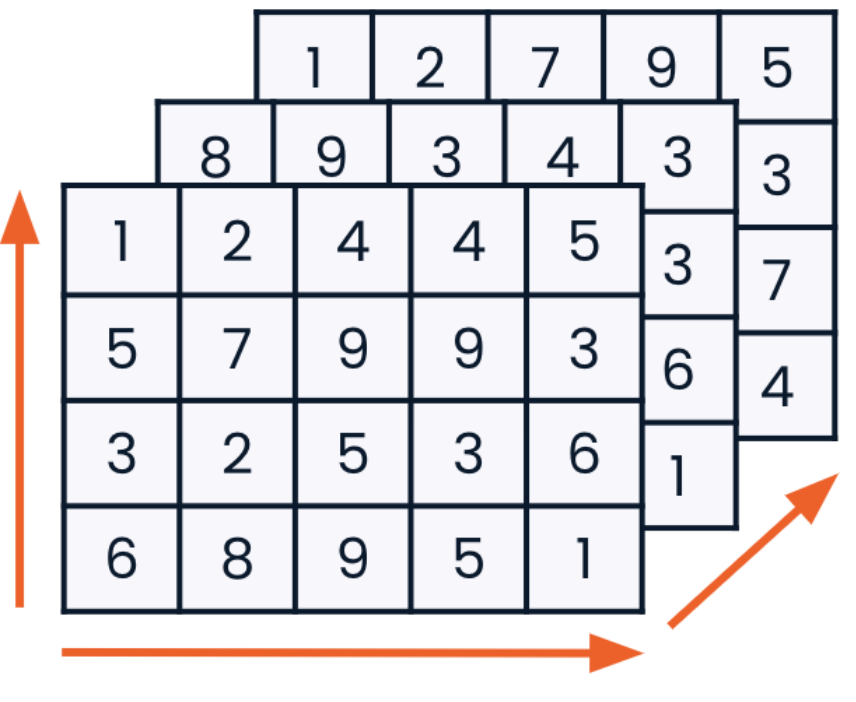

We can refer to 3D arrays/matricies as tensors. [Valchanov, 2023](https://365datascience.com/tutorials/python-tutorials/tensor/) provides some useful highlights about why we might want to use tensors in our programs:
> A **tensor** is a mathematical object that generalizes scalars, vectors, and matrices into higher-dimensional spaces. It’s an array of numbers and functions encompassing physical quantities, geometric transformations, and various mathematical entities. In a way, tensors are containers that present data in n-dimensions. They are typically grids of numbers called N-way arrays.

>The word tensor, however, is still somewhat obscure. You won’t hear it in high school. Your math teacher may have never heard of it. But state-of-the-art machine learning frameworks are doubling down on tensors, with the most prominent example being Google’s TensorFlow. TensorFlow works with tensors, which not only optimizes CPU usage but also allows us to employ **GPUs** to make calculations. In 2016, Google developed **Tensor Processing Units** (TPUs)—processors that consider a tensor a building block for a calculation, not 0s and 1s, as does a CPU. This makes calculations exponentially faster.

> In machine learning, we often explain a single object with several dimensions. For instance, a photo is described by pixels—each with intensity, position, and (color) depth. 

If you are interested in learning more about how GPUs can speed up computation, read this [IBM](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html) article. 

## 5. Useful numpy functons! <a class="anchor" id="bullet5"></a>

In [55]:
# create a ndarray of 5 0s
arr6 = np.zeros(5)
print(arr6)

[0. 0. 0. 0. 0.]


In [56]:
# create a ndarray of 10 1s
arr7 = np.ones(10)
print(arr7)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
# create an identity matrix of size 2 by 2
arr8 = np.identity(2)
print(arr8)

[[1. 0.]
 [0. 1.]]


The following demonstrates different ways of using np.arange to create lists. 

In [74]:
# numpy has its own version of base python's range function which creates a ndarray function
arr9 = np.arange(10)  # by default this function starts at 0
print(arr9)
type(arr9)

[0 1 2 3 4 5 6 7 8 9]


numpy.ndarray

In [59]:
arr10 = np.arange(1, 10) # start at 1
print(arr10)

[1 2 3 4 5 6 7 8 9]


In [60]:
arr11 = np.arange(1, 10, 2) # skip every other number
print(arr11)

[1 3 5 7 9]


## 6. dtype attribute <a class="anchor" id="bullet6"></a>

The **dtype** (data type) attribute tells us information about the kind of data the ndarray holds. Numpy data types also record the number of bits a data value requires to store it in memory. For example, `np.int64` and `np.int32` refer to integer data types which store 64 and 32 bits respectively. This allows us to optimize our code by only commiting the smallest bit size we need for a particular variable.  

**Question**: When would it matter to make sure you are using 32 vs 64 bit integers?

Recall that a **bit** is short for binary (1/0) digit, it is the smallest component available for consuming computer memory. 8 bits = 1 byte. A byte is a sequence of bits. `np.int32` can store 2^32 integers (or more than 4.2 trillion integers!). `np.int64` can hold 2^64 hold much more! Here's how we write the numbers 1-10 in binary!

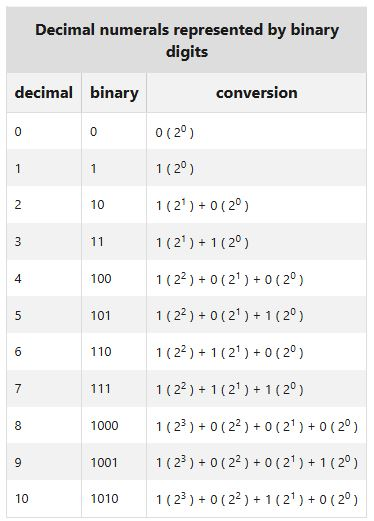

For string data types, you will see the data type reported as, for example, `<U11`, which literally means it is storing a unicode value with maximum length 11. 

In [60]:
print(np.array(['test']).dtype)
print(np.array(['tests']).dtype)
print(np.array(['testing']).dtype)

<U4
<U5
<U7


Remember: 1D numpy arrays can only have one data type! Below, we see a process called **type conversion** which automatically occurs when you pass multiple data types to a `np.array()` function.

In [62]:
arr = np.array([1, 3, 5, '7'])  # Because arrays can only have one data type, they will automatically coerce the data values into a single type.
print(arr)
arr.dtype

['1' '3' '5' '7']


dtype('<U11')

In [61]:
arr = np.array([1, 3, 5, '7'], dtype='<U1')  # We can also define the dtype when we create the array
print(arr)
arr.dtype   # If we only need single digits, <U1 is a more efficient dtype as compared to the default <U11 we were getting before

['1' '3' '5' '7']


dtype('<U1')

In [62]:
print(arr7)
arr7.dtype

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


dtype('float64')

In [63]:
print(arr10)
arr10.dtype

[1 2 3 4 5 6 7 8 9]


dtype('int32')

The method **astype** can convert or cast a ndarray's data from one type to another

In [64]:
arr7_temp = arr7.astype(np.int64)
print(arr7_temp)
arr7_temp.dtype

[1 1 1 1 1 1 1 1 1 1]


dtype('int64')

## 7. Index and Slicing <a class="anchor" id="bullet7"></a>

Slicing for nd.arrays is similar to slicing for lists

In [75]:
arr9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [76]:
# grabbing one element using its (zero-based) index, in this case, grabbing the 3rd element
arr9[2]

2

In [77]:
# grabbing a range/subset of elements within the array
## format =[start:stop], does not include 'stop' index element
arr9[2:6]

array([2, 3, 4, 5])

In [78]:
# replace a value or range of values in the array
arr9[0] = 1
arr9[2:6] = 50
arr9

array([ 1,  1, 50, 50, 50, 50,  6,  7,  8,  9])

In [80]:
# other ways to slice. Somewhat confusingly, the right index is not-inclusive, while the left index is
print(arr9[:2])
print(arr9[1:])

[1 1]
[ 1 50 50 50 50  6  7  8  9]


With higher dimensional arrays, there are more options for indexing/slicing.

In [81]:
arr2

array([[10, 20, 30],
       [ 5, 10, 15],
       [ 1,  1,  1]])

In [82]:
# Here, we extract the 2nd element from the first dimension from the nested array
arr2[1]

array([ 5, 10, 15])

In [83]:
# 2nd element from first dim, and then the 2nd element from second dim
arr2[1][1]

10

In [84]:
arr2[1, 1] # another way to do it

10

You can think of the first index (of a 2D array) as subsetting the row and then secondly the column.

In [85]:
# grabbing a column
arr2[:, 1:2]

array([[20],
       [10],
       [ 1]])

In [86]:
arr2[:, 1]

array([20, 10,  1])

In [87]:
# grabbing the first two elements of the row given columns
arr2[:2, :2]

array([[10, 20],
       [ 5, 10]])

## 8. copy function <a class="anchor" id="bullet8"></a>

In [88]:
arr2

array([[10, 20, 30],
       [ 5, 10, 15],
       [ 1,  1,  1]])

In [93]:
# copies values in a duplicate, unrelated array, Changes in one array don't affect the other, which is probably the behavior you want
old_values = arr2[0].copy()  # .copy() method
old_values

array([0, 0, 0])

In [94]:
arr2[0] = 42
arr2

array([[42, 42, 42],
       [ 0,  0,  0],
       [ 0,  0,  0]])

In [95]:
arr2[0] = old_values
arr2

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [100]:
test_array = arr2
test_array[:, :] = 0   # This does not create a copy, but a view! Meaning when you change test_array, you are changing arr2 since they are pointing to the same object in memory
test_array

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

###### Challenge: Based on all the code in section 8, what is the result of print(arr2)?

In [ ]:
arr2

## 9. Boolean Indexing <a class="anchor" id="bullet9"></a>

In [102]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

In [103]:
names == "Joe" # Create boolean array based on logical check (very useful for slicing as we will soon see)

array([False,  True, False, False, False,  True,  True])

In [104]:
arr9

array([ 1,  1, 50, 50, 50, 50,  6,  7,  8,  9])

In [105]:
arr9 >= 98

array([False, False, False, False, False, False, False, False, False,
       False])

In [106]:
names[names == "Joe"] # boolean array can be used to slice arrays

array(['Joe', 'Joe', 'Joe'], dtype='<U4')

In [107]:
arr9[arr9 >= 9]

array([50, 50, 50, 50,  9])

In [108]:
# Use the negation operator (2 ways):
print(names != "Joe")
print(~(names == "Joe"))

[ True False  True  True  True False False]
[ True False  True  True  True False False]


In [109]:
# to combine multiple booleans conditions, use % (and) and | (or)
mask = (names == "Joe") | (names == "Will")
mask

array([False,  True,  True, False,  True,  True,  True])

In [110]:
names[mask]

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], dtype='<U4')

## 10. Reshaping and Transposing Arrays <a class="anchor" id="bullet10"></a>

Transposing is a form of reshaping that swaps the axes.

In [112]:
arr12 = np.arange(15).reshape((3, 5))
arr12

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

The **transpose** of a matric is found by interchanging its rows and columns. In Python can be accessed with the `.T` attribute.

In [113]:
arr12.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [114]:
arr13 = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr13

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [115]:
print(np.dot(arr13.T, arr13)) # Transposes are often used for matrix computations such as calculating the inner matrix product
arr13.T @ arr13

[[39 20 12]
 [20 14  2]
 [12  2 10]]


array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [116]:
# another way to transpose
arr12.swapaxes(0, 1)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

A common data transformation you will need to make is concatenation, or simply combining two arrays. This means adding extra rows/columns to your dataset. 

In [117]:
classroom_ids_and_sizes = np.array([[1, 22], [2, 21], [3, 27], [4, 26]])
new_classrooms = np.array([[5, 30], [6, 17]])  # add the new classroom as classes 5 and 6!
np.concatenate((classroom_ids_and_sizes, new_classrooms)) # by default, this appends rows

array([[ 1, 22],
       [ 2, 21],
       [ 3, 27],
       [ 4, 26],
       [ 5, 30],
       [ 6, 17]])

In [118]:
classroom_ids_and_sizes = np.array([[1, 22], [2, 21], [3, 27], [4, 26]])
grade_levels_and_teachers = np.array([[1, "James"], [1, "George"], [3,"Amy"], [3, "Meehir"]])
np.concatenate((classroom_ids_and_sizes, grade_levels_and_teachers), axis=1)  # adds 2 new columns to data. 
# Notice the type conversion going on here, all data values are made into strings

array([['1', '22', '1', 'James'],
       ['2', '21', '1', 'George'],
       ['3', '27', '3', 'Amy'],
       ['4', '26', '3', 'Meehir']], dtype='<U11')

For this to work, the shape or dimension of the two arrays you are attempting to concatenate must be compatible. 
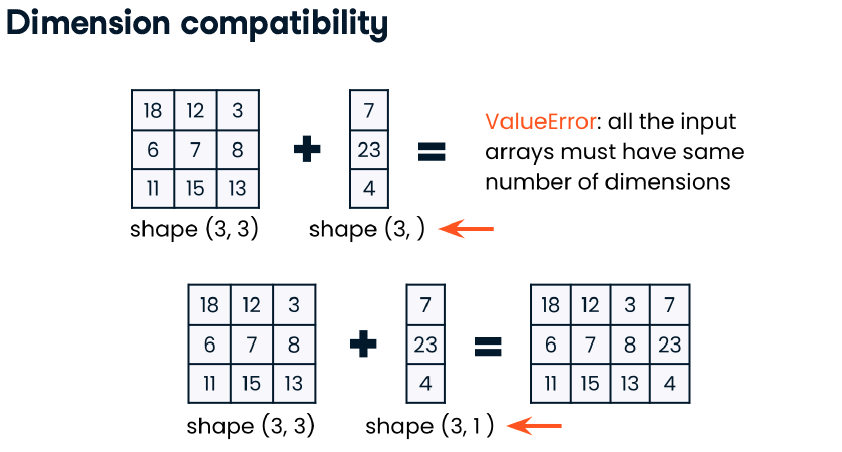

In [119]:
mat1 = np.arange(0,9).reshape((3,3))
print(mat1)
print(mat1.shape)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(3, 3)


In [121]:
mat2 = np.arange(0,3).reshape((3,1))
np.concatenate( (mat1, mat2), axis = 1)  # this works

array([[0, 1, 2, 0],
       [3, 4, 5, 1],
       [6, 7, 8, 2]])

In [122]:
mat2 = np.arange(0,3).reshape((3,))
np.concatenate( (mat1, mat2), axis = 1)  # this does not work

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

## 11. Uniform and standard normal distributions <a class="anchor" id="bullet11"></a>

In [123]:
import matplotlib.pyplot as plt

In [124]:
rng = np.random.default_rng(seed=3252)

In [125]:
s1 = rng.uniform(-1,0,1000)
hist, bin_edges = np.histogram(s1)

(0.0, 120.0)

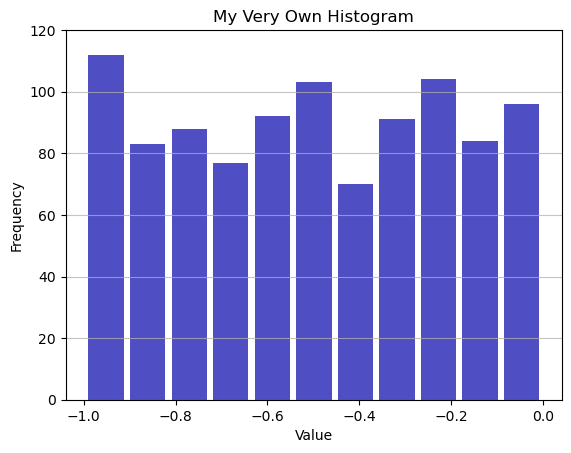

In [126]:
s1 = rng.uniform(-1,0,1000)

# matplotlib method
n, bins, patches = plt.hist(x=s1, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 120.0)

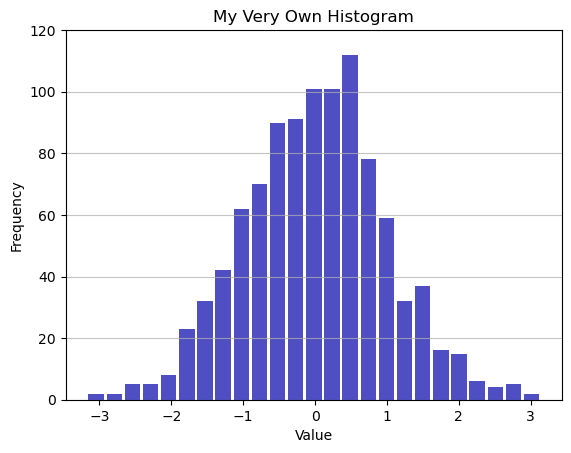

In [127]:
s2 = rng.standard_normal(1000)
from scipy import stats

# matplotlib method
n, bins, patches = plt.hist(x=s2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## 12. Universal Functions <a class="anchor" id="bullet12"></a>

"A **universal function**, or ufunc, is a function that performs element-wise operations on data in ndarrays." - _McKinney_

In [211]:
arr14 = np.arange(10)
arr14

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [125]:
np.sqrt(arr14) # square root every element

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [127]:
np.exp(arr14)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

There are also binary ufuncs, which simply means functions applied to a pair of elements from different objects

In [128]:
x = rng.standard_normal(8)
x

array([-0.11204151, -1.71106275, -0.76183193, -0.8502788 ,  0.86885581,
        0.93675948, -0.56095715, -1.82023862])

In [129]:
y = rng.standard_normal(8)
y

array([ 1.25735355,  0.84928029, -0.9534852 , -0.85142703, -0.594768  ,
       -1.98106821, -1.29399437,  0.28084041])

In [130]:
np.maximum(x, y)

array([ 1.25735355,  0.84928029, -0.76183193, -0.8502788 ,  0.86885581,
        0.93675948, -0.56095715,  0.28084041])

In [131]:
np.add(x, y)

array([ 1.14531203, -0.86178246, -1.71531713, -1.70170584,  0.27408781,
       -1.04430874, -1.85495153, -1.53939821])

In [145]:
x + y  # same as np.add(x, y)

array([ 1.14531203, -0.86178246, -1.71531713, -1.70170584,  0.27408781,
       -1.04430874, -1.85495153, -1.53939821])

In [147]:
"test" + "s"  # Notice that the "+" operator has different behaviors depending on object dtypes !

'tests'

In [148]:
np.subtract(x, y) == x - y  # np.subtract function is same as subtracting the two arrays

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [149]:
np.divide(x, y)

array([-0.089109  , -2.01472089,  0.79899712,  0.99865141, -1.46083148,
       -0.47285574,  0.43350819, -6.48139857])

In [150]:
np.multiply(x, y)

array([-0.1408758 , -1.45317187,  0.72639547,  0.72395036, -0.51676763,
       -1.85578443,  0.7258754 , -0.51119655])

In [151]:
np.floor_divide(x, y)

array([-1., -3.,  0.,  0., -2., -1.,  0., -7.])

In [152]:
# Quick examples of power() function
# Example 1: Get the scalar as exponent of an array 
arr = np.power(4,3)
arr

64

In [148]:
# Example 2: Get the exponents of an array 
arr = np.array([2, 3, 5, 8, 9,4])
arr1 = np.power(arr, 3)
arr1

array([  8,  27, 125, 512, 729,  64], dtype=int32)

In [154]:
# Example 3: Raise one array by exponents in another array
arr = [2, 4, 6, 5, 3]
arr1 = [2, 3, 2, 4, 1]
arr2 = np.power(arr,arr1) # default power is 2
arr2

array([  4,  64,  36, 625,   3], dtype=int32)

In [155]:
# And more... refer back to Mckinney for a complete list

## 13. np.where and list comprehensions <a class="anchor" id="bullet13"></a>

A typical use of where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is possible to do with numpy.where.

In [156]:
arr = rng.standard_normal((4, 4))
arr

array([[ 0.63322147,  1.29734841, -0.27482005,  1.70339512],
       [ 0.27434627, -0.10126616, -0.50956109,  1.23862129],
       [ 1.6859472 , -0.17379124,  1.88668631, -0.23876523],
       [-0.42702852,  0.05865702,  0.74213727,  1.46230853]])

In [157]:
arr > 0 # codition or logical check, which returns boolen array of same dims

array([[ True,  True, False,  True],
       [ True, False, False,  True],
       [ True, False,  True, False],
       [False,  True,  True,  True]])

In [158]:
np.where(arr > 0, 2, -2) # if value is positive, we input a 2. Otherwise, -2

array([[ 2,  2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2, -2],
       [-2,  2,  2,  2]])

**Challenge:** Imagine we wanted to clean the gender data below, transforming the entries to all have only a single character. How could we efficiently do this?

In [159]:
gender = np.array(['Female', 'F', 'Female', 'M', 'Male'])
gender

array(['Female', 'F', 'Female', 'M', 'Male'], dtype='<U6')

In [160]:
# np.where avoids this convuluted code, where we needed two list comprehensions 
# Let's use this opportunity to learn about list comprehensions
result = [(x if c else y)
           for x, y, c in zip(gender, gender.astype('<U1'), 
                              [ x==1 for x in [len(i) for i in gender]])]
result

['F', 'F', 'F', 'M', 'M']

List comprehensions have the format below. These are similar to for loops, so we will review these in more detail when we study for loops in the near future. For now, let's focus on the three main elements of a list comprehension:
- An **iterable** is something like the object gender, which is (in this case) a list object of length 5. Python treats this as an "iterable" object, since we can use various functions or control statements to iterate through the elements or items of a list object.
- An **item** or **element** refer to the unique values in the iterable object.
- An **expression** which is telling python to adjust the item in some specific way.

In [ ]:
newlist = [expression for item in iterable]

Let's look at how list comprehensions work in practice to learn more about them. The code above for modifying the gender object has multiple list comprehensions embedded in it. Let's that break down step by step.

In [162]:
[len(i) for i in gender] # this is a list comprehension, which returns a new list of values after iterating through some Python object
# gender = iterable.   List objects, tuples, dictionaries and sets are all iterable objects in python
# i      = item.       We could name it whatever we want, like x for example.
# len(i) = expression. Here, we are telling python to return the length of each value i.

[6, 1, 6, 1, 4]

In [163]:
[ x==1 for x in [len(i) for i in gender]] # nested list comprehension to make a boolean array

[False, True, False, True, False]

In [195]:
# the zip function "ties togehter" or "zips" data together in logical chunks by parsing the data into tuples (more on this below)
# But it returns it as a tuple as we can see 
zipped_obj = zip(gender, gender.astype('<U1'), [ x==1 for x in [len(i) for i in gender]]) 
zipped_obj 

In [196]:
# Close to what we wanted, but we need to keep going
print(list(zipped_obj))

[('Female', 'F', False), ('F', 'F', True), ('Female', 'F', False), ('M', 'M', True), ('Male', 'M', False)]


In [197]:
# From here, we need to extract the 2nd element of each tuple. We can do this with another list comprehension.
zipped_obj = zip(gender, gender.astype('<U1'), [ x==1 for x in [len(i) for i in gender]])
result = [x if c else y for x, y, c in list(zipped_obj)]
result

['F', 'F', 'F', 'M', 'M']

In [198]:
np.in1d(gender, ['F', 'M']) # np.in1d tests membership of the values in one array in another, returning a Boolean array

array([False,  True, False,  True, False])

**Challenge**: Use the cell below to use the np.where() function to recode the gender array. Note that there are many ways to do this!

array(['F', 'F', 'F', 'M', 'M'], dtype='<U6')

The zip function is confusing, but I've included some details below about what it does exactly.

In [13]:
# zip() returns an iterator of tuples, where the i-th tuple contains the i-th element 
# from each of the argument iterables.
# zip() is lazy: The elements won’t be processed until the iterable is iterated on, 
# e.g. by a for loop or by wrapping in a list.
print(test) 

## 14. Mathematical and Statistical Methods <a class="anchor" id="bullet14"></a>

"A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class." - *McKinney*

In [201]:
arr16 = rng.standard_normal((5, 4))
arr16

array([[-1.27155659,  1.75151546, -0.04236917,  0.29075856],
       [ 0.97617857,  1.33487998,  0.51320945, -0.93006432],
       [-1.14780267, -0.47534846,  0.41866579, -0.69799132],
       [-0.14869128,  1.37628474, -0.12923346, -1.23011292],
       [ 0.16633484,  1.88443283,  0.68846058, -0.2637946 ]])

In [202]:
# Note it may not make sense to take the mean of a 2D array. Column or row means could make more sense
arr16.mean() # mean as a method

0.1531878005177915

In [203]:
np.mean(arr16) # mean as a function

0.1531878005177915

In [204]:
arr16.sum() # sum as a method

3.0637560103558297

In [205]:
# Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one less dimension:
# compute mean across the columns
arr16.mean(axis=1)

array([ 0.18208707,  0.47355092, -0.47561916, -0.03293823,  0.61885841])

In [206]:
# compute sum down the rows
arr16.sum(axis=0)

array([-1.42553713,  5.87176454,  1.44873319, -2.83120459])

In other words, axis=1 computes the mean across the columns while axis=0 computes the mean down the rows.
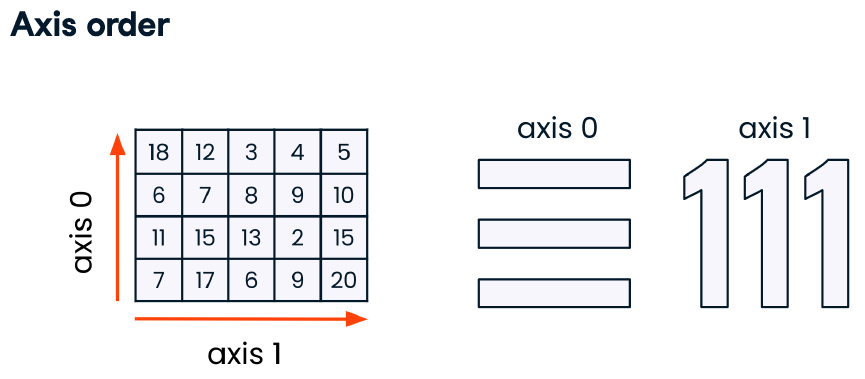

In [215]:
# Other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:
arr14

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [216]:
arr14.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [217]:
arr16.cumsum(axis=0) # computes along rows

array([[-1.27155659,  1.75151546, -0.04236917,  0.29075856],
       [-0.29537802,  3.08639544,  0.47084028, -0.63930575],
       [-1.44318069,  2.61104698,  0.88950608, -1.33729707],
       [-1.59187197,  3.98733171,  0.76027261, -2.56740999],
       [-1.42553713,  5.87176454,  1.44873319, -2.83120459]])

In [218]:
arr16.cumsum(axis=1) # computes along columns

array([[-1.27155659,  0.47995887,  0.4375897 ,  0.72834826],
       [ 0.97617857,  2.31105855,  2.824268  ,  1.89420368],
       [-1.14780267, -1.62315113, -1.20448534, -1.90247665],
       [-0.14869128,  1.22759346,  1.09835999, -0.13175293],
       [ 0.16633484,  2.05076767,  2.73922825,  2.47543364]])

## 15. Methods for boolean arrays <a class="anchor" id="bullet15"></a>

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a Boolean array:

In [219]:
arr17 = rng.standard_normal(100)
arr17

array([-1.89480398, -1.33308863,  0.55760848, -0.67317217, -0.67853776,
        0.36118608,  2.33305943,  0.40096105,  1.30925879,  0.48947548,
        0.22623151,  0.20264553,  1.18959941,  0.44907315,  1.02029936,
        0.80061559, -0.69425261, -0.86750101, -1.7507845 ,  0.61967784,
       -1.57137666, -0.13948033, -1.09272589, -1.81328839, -2.09506327,
        0.04925781, -0.52325044, -0.18738499, -0.4799742 ,  0.11119518,
        0.41284466,  1.49640457, -1.04446766,  0.94460854, -2.04030008,
        0.64534598, -1.13573203, -0.16378675, -0.97910309,  0.82391182,
        0.32735859,  0.21294312, -1.29923257,  0.36337694,  0.8295713 ,
       -0.00516515,  0.17306573, -0.462071  ,  1.00338935,  1.16978157,
       -0.45204533, -0.7212556 ,  0.38469876,  0.21923171, -0.06749306,
        0.80282241, -1.63765164,  0.9630067 , -0.9727622 ,  1.00698461,
       -0.31781009,  1.61323877, -0.26752939, -1.24208421,  0.15997188,
       -0.96562268,  0.75871396, -2.13402455, -0.30590376, -0.69

In [220]:
(arr17 > 0) # boolean array

array([False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False,  True, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False])

In [221]:
(arr17 > 0).sum() # Number of positive values

50

In [222]:
(arr17 <= 0).sum() # Number of non-positive values

50

Two additional methods, `any()` and `all()` are useful for Boolean arrays.
- `any()` tests whether one or more values in an array is True
- `all()` checks if every value is True.

In [223]:
bools = np.array([False, False, True, False])

print(bools.any())
bools.all()

True


False

These methods also work with non-Boolean arrays, where nonzero elements are treated as True.

## 16. Sorting <a class="anchor" id="bullet16"></a>

In [224]:
arr18 = rng.standard_normal(6)
arr18

array([ 0.52952498,  1.03292784, -0.86958103, -0.02284997,  0.04625348,
       -0.92453473])

In [225]:
arr18.sort()
arr18

array([-0.92453473, -0.86958103, -0.02284997,  0.04625348,  0.52952498,
        1.03292784])

In [226]:
# multidimensional sorting
arr19 = rng.standard_normal((5, 3))
arr19

array([[ 1.0131198 , -1.13832708, -0.37660091],
       [ 2.93861337, -0.65347146, -0.29532389],
       [ 0.14482664,  0.69841628,  0.53095393],
       [ 1.67291866,  0.06846586, -1.93591663],
       [ 0.27700013,  0.62616729, -0.90140654]])

In [227]:
arr19.sort(axis=0) # sort within each column
arr19

array([[ 0.14482664, -1.13832708, -1.93591663],
       [ 0.27700013, -0.65347146, -0.90140654],
       [ 1.0131198 ,  0.06846586, -0.37660091],
       [ 1.67291866,  0.62616729, -0.29532389],
       [ 2.93861337,  0.69841628,  0.53095393]])

In [228]:
arr19.sort(axis=1) # sort across each row
arr19

array([[-1.93591663, -1.13832708,  0.14482664],
       [-0.90140654, -0.65347146,  0.27700013],
       [-0.37660091,  0.06846586,  1.0131198 ],
       [-0.29532389,  0.62616729,  1.67291866],
       [ 0.53095393,  0.69841628,  2.93861337]])

The top-level method numpy.sort returns a sorted copy of an array (like the Python built-in function sorted) instead of modifying the array in place. For example:

In [229]:
arr20 = np.array([5, -10, 7, 1, 0, -3])
arr20

array([  5, -10,   7,   1,   0,  -3])

In [230]:
sorted_arr20 = np.sort(arr20)
sorted_arr20

array([-10,  -3,   0,   1,   5,   7])

## 17. The unique function <a class="anchor" id="bullet17"></a>

In [231]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [232]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [233]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [234]:
np.unique(ints)

array([1, 2, 3, 4])

In [235]:
# pure python alternative:
sorted(set(names)) # sets don't reflect duplicates, so this is another way to get all unique values

['Bob', 'Joe', 'Will']

Another function, `numpy.in1d()`, tests membership of the values in one array in another, returning a Boolean array:

In [236]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
values

array([6, 0, 0, 3, 2, 5, 6])

In [237]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 18. Linear Algebra <a class="anchor" id="bullet18"></a>

In [238]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [239]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [240]:
x.dot(y) # == np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [241]:
# importing inverse and determinant functions
from numpy.linalg import inv, qr

X = rng.standard_normal((5, 5))
X

array([[ 1.62397757,  0.64516257,  0.17659943, -2.39213367,  1.15036142],
       [ 0.06483924, -0.56568431, -1.4719627 , -1.12794331,  1.18096807],
       [-0.20820566,  0.94539929, -0.6911267 ,  1.34786659, -0.31991667],
       [ 0.52832858,  0.45464647, -1.40662798,  0.41764408, -0.35467188],
       [-0.41913347, -0.14573177,  0.77867687, -0.04531134,  0.09447885]])

In [242]:
mat = X.T @ X
mat

array([[ 3.13966083,  1.1154973 , -0.73428223, -3.99889507,  1.78436013],
       [ 1.1154973 ,  1.85795445, -0.45978555,  0.56550055, -0.40335286],
       [-0.73428223, -0.45978555,  5.26045761, -0.31645828, -0.74162494],
       [-3.99889507,  0.56550055, -0.31645828,  8.98778365, -4.66749587],
       [ 1.78436013, -0.40335286, -0.74162494, -4.66749587,  2.95508203]])

In [243]:
inv(mat)

array([[114.08480057, -72.36276569,  30.06053245, 107.84217004,
         99.11414397],
       [-72.36276569,  46.48937977, -18.96713607, -68.28493179,
        -62.57466902],
       [ 30.06053245, -18.96713607,   8.20762087,  28.68427647,
         26.62581049],
       [107.84217004, -68.28493179,  28.68427647, 102.81274368,
         95.15094246],
       [ 99.11414397, -62.57466902,  26.62581049,  95.15094246,
         88.92071179]])

In [244]:
mat @ inv(mat)

array([[ 1.00000000e+00,  8.05690746e-15, -2.09467688e-14,
        -3.46041195e-14, -9.42751562e-15],
       [-8.07473711e-14,  1.00000000e+00, -1.91576345e-14,
        -3.16152122e-14, -3.32639517e-14],
       [ 3.83302503e-14, -4.45657038e-16,  1.00000000e+00,
         1.08855285e-14, -1.12413476e-14],
       [-2.03635125e-14, -2.22927227e-14, -8.87797889e-16,
         1.00000000e+00,  1.54768394e-14],
       [-1.04521824e-14,  1.12298717e-14, -1.69857953e-14,
        -2.13206458e-14,  1.00000000e+00]])

In [245]:
# and more... refer back to Mckinney for a complete list

### Challenge: Use the code below to generate Y,  X1 and X2. Then, use NumPy's linear algebra functions to fit a regression of Y on X1 and X2 using matrix multiplication

In [246]:
# Generate data for this exercise
x1 = rng.standard_normal(1000)
x2 = rng.standard_normal(1000)

In [247]:
Y = -1 + 2*x1 + 7*x2 + rng.standard_normal(1000)

**Step 1:** Create the design matrix, which has n rows and 3 columns (the first columns is all 1s, then x1 and x2 are the second and third columns). Hint: Use np.column_stack((col1, col2)) to combine an array of 1s, x1, and x2

In [37]:
X.shape # hint, this is the shape of the design matrix which you should get

(1000, 3)

**Step 2:** Read [here](https://cmdlinetips.com/2020/03/linear-regression-using-matrix-multiplication-in-python-using-numpy/) if you are interested in learning more about using linear algebra to fin a linear regression. About half way down the page, there is a formula for the regression estimates $\hat{\beta} = (X^{T} * X)^{-1} * X^{T} * Y$. If you are not familiar with linear algebra, there are two things you need to know to apply this formula:  
1.  When we multiply matrices, the operation is called taking the "dop product", which you can do with the `.dot()` method shown above in this section
2. The -1 exponent is linear algebra notation for "take the inverse". What this means exactly is beyond the scope of this class, but for our purposes there is a function in NumPy's linalg module that can return an inverse function (assuming one exists). You can call this function with the following syntax: `np.linalg.inv(X)`. 

Using these two linear algebra facts, you can compute the linear regression estimates for the regression of Y on x1 and x2. Your challenge is to execute this formula and generate slope estimates of $\hat\beta_{0}$, $\hat\beta_{1}$, and $\hat\beta_{2}$. According to the data generating process above, these estimates should be close to -1, 2 and 7 respectively. 

In [ ]:
# Perform linear algebra calculations here, store in an object called beta_hat
beta_hat = 
beta_hat